# Analisis Bisnis Y.Afisha


# Pendahuluan

Anda menjalani program magang di departemen analitik perusahaan Y.Afisha. Tujuan dari analisis ini untuk membantu mengoptimalkan anggaran biaya pemasaran dengan menjawab pertanyaan berikut ini:

* Bagaimana para pengguna menggunakan produk Y.Afisha?
* Kapan mereka mulai melakukan pembelian?
* Berapa jumlah uang yang disumbangkan oleh setiap pengguna?

# Ikhtisar Data

In [1]:
#memuat semua library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


In [2]:
#memuat data

visit = pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
cost = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])

In [3]:
#melihat sample data tabel visit

visit.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
301384,desktop,2018-02-15 13:58:00,1,2018-02-15 13:53:00,8980625981402813446
214910,touch,2018-01-01 15:18:00,4,2018-01-01 14:51:00,16709561129979077556
340166,touch,2017-09-16 10:14:00,5,2017-09-16 09:54:00,4171991228153469134
267676,desktop,2018-01-27 19:25:00,3,2018-01-27 19:06:00,17035383062616419594
154014,desktop,2018-05-20 21:06:00,4,2018-05-20 21:03:00,6161741443508511626


In [4]:
#melihat tipe data table visit

visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
#melihat sample data tabel orders

orders.sample(5)

,Buy Ts,Revenue,Uid
507,2017-06-06 01:36:00,0.46,2957678044564230933
35592,2018-02-18 21:04:00,3.67,15484461171636909708
13510,2017-10-19 04:01:00,3.05,2607894987576387783
7752,2017-09-14 13:11:00,0.92,2007760079276099119
45490,2018-04-25 16:19:00,2.92,6710261043303562974


In [6]:
#melihat tipe data tabel orders

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
#melihat sample data tabel costs

cost.sample(5)

,source_id,dt,costs
746,3,2017-06-21,205.21
1123,4,2017-07-05,74.94
1226,4,2017-10-16,103.63
1326,4,2018-01-24,106.02
2353,10,2017-11-22,4.93


In [8]:
#melihat tipe data tabel costs

cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [9]:
#melihat statistik deskriptif tabel costs

cost.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [10]:
#memeriksa nilai duplikat

print('Data yang terduplikasi pada tabel visit yaitu sebanyak', visit.duplicated().sum())
print('Data yang terduplikasi pada tabel orders yaitu sebanyak', orders.duplicated().sum())
print('Data yang terduplikasi pada tabel costs yaitu sebanyak', cost.duplicated().sum())


Data yang terduplikasi pada tabel visit yaitu sebanyak 0
Data yang terduplikasi pada tabel orders yaitu sebanyak 0
Data yang terduplikasi pada tabel costs yaitu sebanyak 0


In [11]:
#memeriksa nilai anomali

visit.query("`End Ts` < `Start Ts`")


,Device,End Ts,Source Id,Start Ts,Uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Kesimpulan dari ikhtisar data:

* Beberapa tipe data harus diubah untuk memperkecil ukuran data, misalkan pada kolom `device` pada tabel visit yang diubah menjadi tipe category karena hanya mengandung beberapa nilai tertentu. Kemudian kolom tanggal pada tabel visit dan costs yang harus diubah dalam datetime
* Judul kolom yang masih berantakan 
* Tidak ada duplikasi dan nilai yang hilang
* Terdapat anomali pada nilai pada kolom `Start Ts` dan `End Ts` 

# Memperkaya kualitas data

In [12]:
#mengubah nama kolom agar lebih rapih

visit.columns = visit.columns.str.replace(' ', '_').str.lower() 
orders.columns = orders.columns.str.replace(' ', '_').str.lower() 


In [13]:
#menghapus nilai anomali 

visit = visit.query("`start_ts` <= `end_ts`").reset_index(drop=True)

Untuk memudahkan proses analisis data, kita akan membuat kolom baru yang berupa hari, bulan, dan tahun dari tabel `visit` dan `orders`

In [14]:
#memuat kolom baru pada tabel visit

visit['start_year'] = visit['start_ts'].dt.year
visit['start_month'] = visit['start_ts'].astype('datetime64[M]')
visit['start_week'] = visit['start_ts'].astype('datetime64[W]')
visit['start_date'] = visit['start_ts'].dt.date
visit


,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27
...,...,...,...,...,...,...,...,...,...
359393,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-01,2017-07-27,2017-07-29
359394,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-01,2018-01-25,2018-01-25
359395,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-01,2018-03-01,2018-03-03
359396,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-01,2017-11-02,2017-11-02


In [15]:
#memuat kolom baru pada tabel orders

orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['buy_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['buy_date'] = orders['buy_ts'].dt.date


In [16]:
#memuat kolom baru pada tabel cost

cost['costs_month'] = cost['dt'].astype('datetime64[M]')


# Eksplorasi Data Analisis

## Analisis Produk

### Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

Untuk menghitung pengguna bulanan, mingguan, dan harian kita akan mengelompokkan masing-masing pengguna berdasarkan tahun dan bulan kunjungan (pengguna bulanan), tahun dan minggu kunjungan (pengguna mingguan), dan tanggal kunjugan (pengguna harian)

In [17]:
#menghitung pengguna bulanan, mingguan, dan harian

mau_total = visit.groupby(['start_year','start_month']).agg({'uid': 'nunique'}).mean()
print('Total Pengguna Bulanan yaitu',int(mau_total))

wau_total = (visit.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'}).mean())
print('Total Pengguna Mingguan yaitu',int(wau_total))

dau_total = (visit.groupby('start_date').agg({'uid': 'nunique'}).mean())
print('Total Pengguna Harian yaitu',int(dau_total))

Total Pengguna Bulanan yaitu 23228
Total Pengguna Mingguan yaitu 5621
Total Pengguna Harian yaitu 907


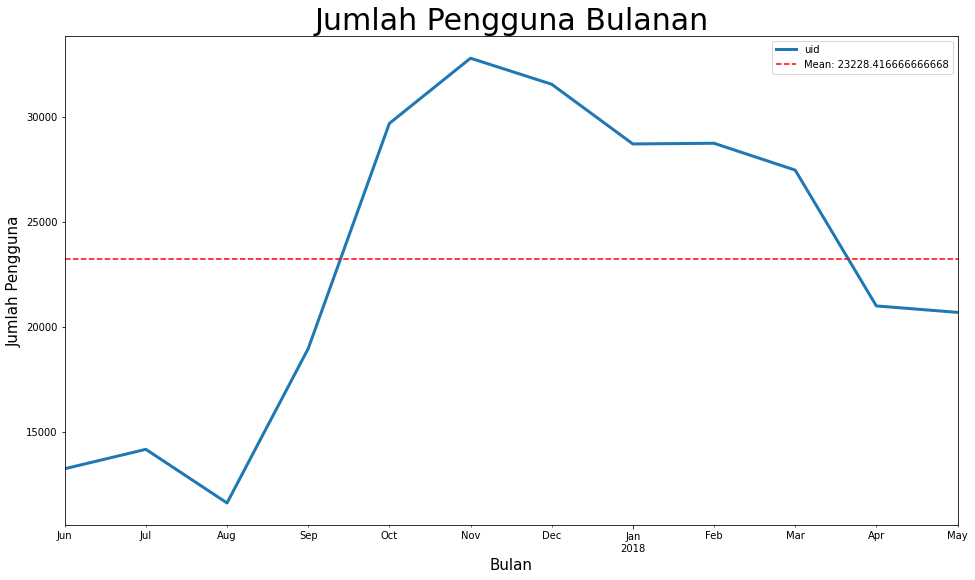

In [18]:
#visualisasi pengguna bulanan

fig, ax = plt.subplots(figsize=(16, 9))
monthly_user = visit.groupby(visit['start_ts'].dt.to_period('M'))['uid'].nunique().plot(linewidth=3)
value = visit.groupby(visit['start_ts'].dt.to_period('M'))['uid'].nunique().mean()
ax.axhline(value, color='red', linestyle='--', label='Mean: {0}'.format(value))
ax.set_xlabel('Bulan',fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengguna',fontdict={'size': 15})
ax.set_title('Jumlah Pengguna Bulanan',fontdict={'size': 30})
plt.legend()
plt.show()

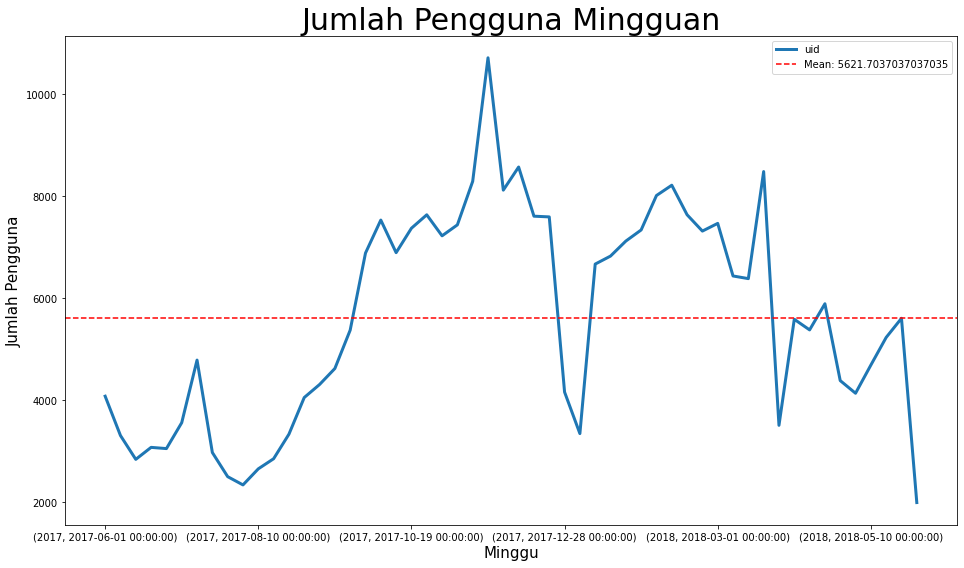

In [19]:
#visualisasi pengguna mingguan

fig, ax = plt.subplots(figsize=(16, 9))
weekly_user = visit.groupby([visit['start_year'],visit['start_week']])['uid'].nunique().plot(linewidth=3)
avg_value = visit.groupby([visit['start_year'],visit['start_week']])['uid'].nunique().mean()
ax.axhline(avg_value, color='red', linestyle='--', label='Mean: {0}'.format(avg_value))
ax.set_xlabel('Minggu',fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengguna',fontdict={'size': 15})
ax.set_title('Jumlah Pengguna Mingguan',fontdict={'size': 30})
plt.legend()
plt.show()


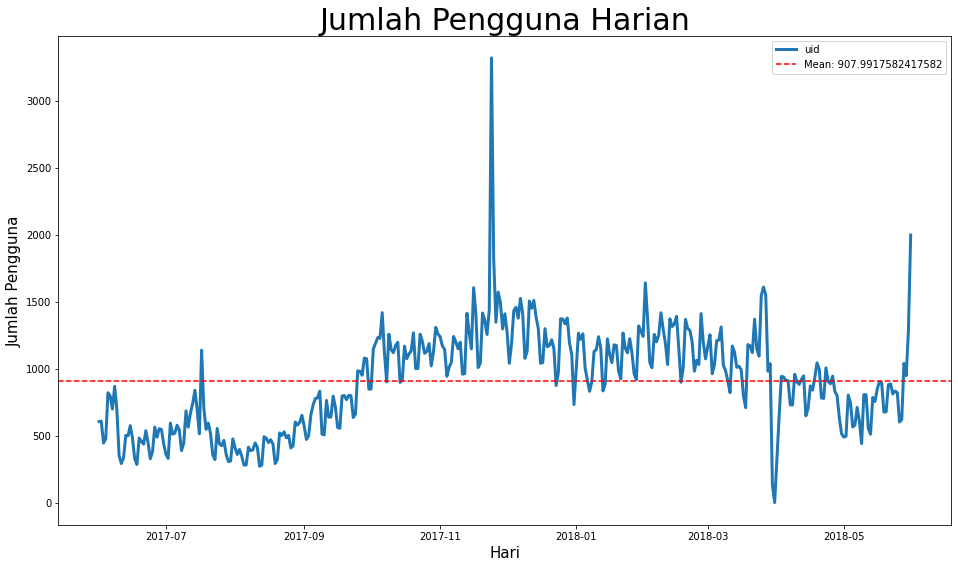

In [20]:
#visualisasi pengguna harian

fig, ax = plt.subplots(figsize=(16, 9))
daily_user = visit.groupby(visit['start_date'])['uid'].nunique().plot(linewidth=3)
mean_value = visit.groupby(visit['start_date'])['uid'].nunique().mean()
ax.axhline(mean_value, color='red', linestyle='--', label='Mean: {0}'.format(mean_value))
ax.set_xlabel('Hari',fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengguna',fontdict={'size': 15})
ax.set_title('Jumlah Pengguna Harian',fontdict={'size': 30})
plt.legend()
plt.show()



Dari grafik pengguna bulanan, mingguan, dan harian dapat diketahui bahwa:

* Jumlah pengguna bulanan dalam kurun waktu satu tahun memiliki rata-rata **23228 pengguna**
* Jumlah pengguna mingguan dalam kurun waktu satu tahun memiliki rata-rata **5621 pengguna**
* Jumlah pengguna harian dalam kurun waktu satu tahun memiliki rata-rata **907 pengguna**
* Bulan **Agustus 2017** memiliki jumlah pengguna bulanan yang **terendah**, namun setelah itu selalu mengalami peningkatan hingga mencapai **puncaknya** pada **November 2017**

### Berapa jumlah sesi per harinya? 

Sesi pengguna adalah serangkaian aktivitas pengguna yang dimulai dengan tindakan membuka aplikasi dan berakhir ketika aplikasi ditutup. Untuk menghitung jumlah sesi per hari dari setiap user, kita akan mengelompokkannya berdasarkan tanggal kunjungan dan membagi jumlah sesi dengan jumlah pengguna untuk periode tertentu

In [21]:
#menghitung jumlah sesi perhari

sessions_per_user = visit.groupby(['start_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
print(sessions_per_user) 



            n_sessions  n_users  sess_per_user
start_date                                    
2017-06-01         664      605       1.097521
2017-06-02         658      608       1.082237
2017-06-03         477      445       1.071910
2017-06-04         510      476       1.071429
2017-06-05         893      820       1.089024
...                ...      ...            ...
2018-05-27         672      620       1.083871
2018-05-28        1156     1039       1.112608
2018-05-29        1035      948       1.091772
2018-05-30        1410     1289       1.093871
2018-05-31        2256     1997       1.129695

[364 rows x 3 columns]


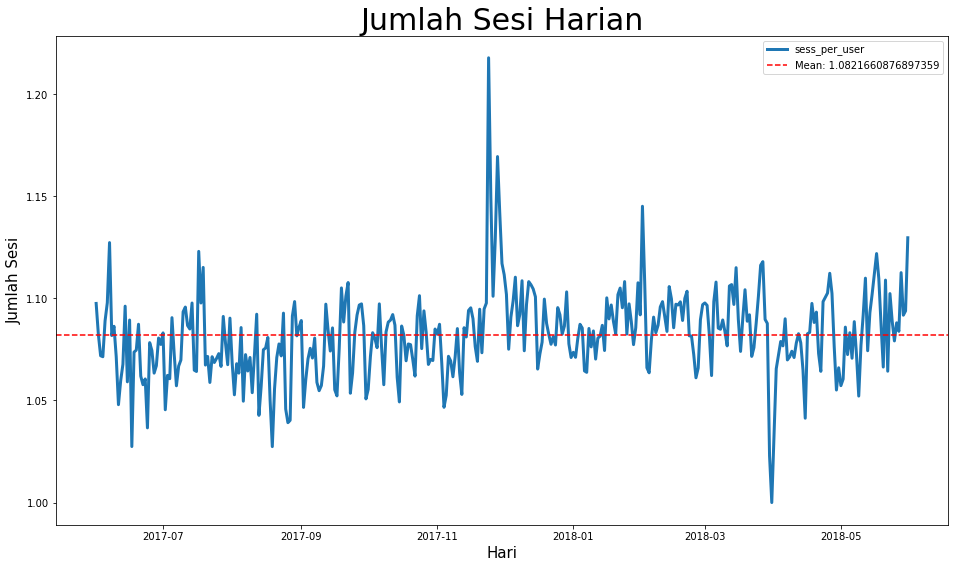

In [22]:
#visualisasi jumlah sesi

fig, ax = plt.subplots(figsize=(16, 9))
sessions_per_user['sess_per_user'].plot(linewidth=3)
avg_sess = sessions_per_user['sess_per_user'].mean()
ax.axhline(avg_sess, color='red', linestyle='--', label='Mean: {0}'.format(avg_sess))
ax.set_xlabel('Hari',fontdict={'size': 15})
ax.set_ylabel('Jumlah Sesi',fontdict={'size': 15})
ax.set_title('Jumlah Sesi Harian',fontdict={'size': 30})
plt.legend()
plt.show()

Ternyata setiap pengguna menghabiskan paling banyak **1 sesi per harinya** dalam penggunaan aplikasi. Ternyata pengguna tidak rutin menggunakan aplikasi ini.

### Berapa lama durasi untuk setiap sesi?

Selanjutnya kita akan menghitung jumlah waktu yang dihabiskan pengguna selama menggunakan produk dalam sesi rata-rata atau **ASL** (Average Session Length) dengan mengurangi waktu akhir sesi dengan waktu mulainya sesi.

In [23]:
#menghitung rata-rata panjang durasi sesi

visit['session_duration_sec'] = (visit['end_ts'] - visit['start_ts']).dt.seconds
asl = visit['session_duration_sec'].mean()
asl

643.0422873805642

In [24]:
#mengetahui durasi yang paling umum

duration_mode = visit['session_duration_sec'].mode()
duration_mode

0    60
dtype: int64

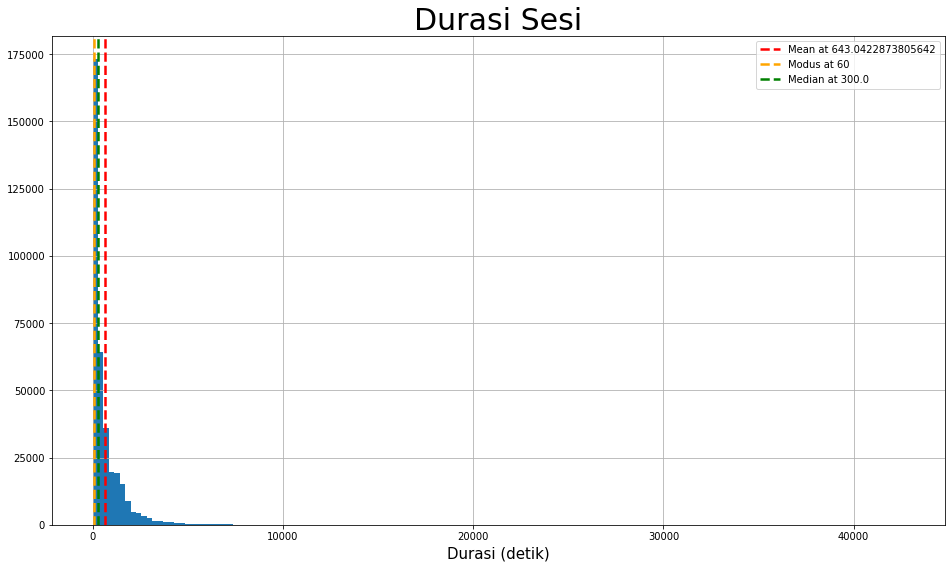

In [25]:
#visualisasi durasi sesi

fig, ax = plt.subplots(figsize=(16, 9))

visit['session_duration_sec'].hist(bins=150)
asl = visit['session_duration_sec'].mean()
duration_mode = visit['session_duration_sec'].mode().values[0]
duration_median = visit['session_duration_sec'].median()

measurements = [asl, duration_mode, duration_median]
names = ["Mean", "Modus", "Median"]
colors = ['red', 'orange', 'green']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), color=color)

ax.set_xlabel('Durasi (detik)', fontdict={'size': 15})
ax.set_title('Durasi Sesi', fontdict={'size': 30})

plt.legend()
plt.show()


* Rentang nilai yang diperoleh cukup luas dengan durasi yang paling tinggi mencapai hingga 40000 detik atau 11 jam
* **Nilai ASL** yang diperoleh yaitu sekitar 643 detik atau kurang lebih **10 menit**
* Sebagian besar pengguna hanya mengakses selama kurang lebih 60 detik atau 1 menit

### Seberapa sering pengguna kembali menggunakan produk?

In [26]:
#menghitung seberapa sering pengguna kembali menggunakan produk

sticky_mau = (dau_total / mau_total) * 100
print(sticky_mau)

uid    3.90897
dtype: float64


Dalam sebulan, ternyata presentase pengguna dalam pemakaian kembali aplikasi (sticky factor) tergolong kecil yaitu hanya 3,9%

**Kesimpulan Analisis Produk**:

* Terdapat 23228 pengguna bulanan, kemudian 5716 pengguna mingguan, dan 907 pengguna harian
* Rata-rata pengguna menggunakan produk dengan durasi 643 detik atau sekitar 10 menit
* Sebagian besar pengguna hanya menggunakan produk selama 60 detik
* Presentase pengguna dalam pemakaian kembali produk hanya sekitar 3,9%. Untuk meningkatkan sticky factor, mungkin bisa menerapkan push notification dan fitur bantuan

## Analisis Penjualan

### Kapan orang-orang mulai melakukan pembelian?

Sekarang kita akan mencari tahu kapan seorang pelanggan melakukan pembelian. Hal yang harus dilakukan itu mengetahui kapan setiap pelanggan melakukan pembelian untuk pertama kalinya dan sesi pertama yang dilakukan

In [27]:
# mengetahui transaksi pertama kali

first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
first_order_date_by_customers


uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: first_order_date, Length: 36523, dtype: datetime64[ns]

In [28]:
# mengetahui kapan pelanggan melakukan sesi pertamanya

first_session_by_customers = visit.pivot_table(index='uid',values='start_ts',aggfunc='min')
first_session_by_customers = first_session_by_customers.rename(columns={'start_ts':'first_session'})
first_session_by_customers


,first_session
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


Selanjutnya kita akan menggabungkan tabel `first_session_by_customers` dan `first_order_date_by_customers` dengan tabel `orders` untuk mengetahui kapan pelanggan melakukan pembelian.

In [29]:
#menggabungkan pembelian pertama dengan tabel order

orders = orders.join(first_order_date_by_customers,on='uid')
orders

,buy_ts,revenue,uid,buy_month,buy_week,buy_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:56:00


In [30]:
#membuat kolom dengan bulan pertama pembelian

orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head(10)

,buy_ts,revenue,uid,buy_month,buy_week,buy_date,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,2017-06-01,2017-06-01 08:43:00,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01,2017-06-01 08:54:00,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01,2017-06-01,2017-06-01,2017-06-01 09:23:00,2017-06-01


In [31]:
# mengetahui jarak antara pembelian pertama dengan sesi kunjungan pertama

orders = orders.join(first_session_by_customers,on='uid')
orders['age_to_buy'] = (orders['first_order_date'] - orders['first_session']).dt.days
orders['age_to_buy'].describe()

count    50415.000000
mean        17.419677
std         46.352290
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: age_to_buy, dtype: float64

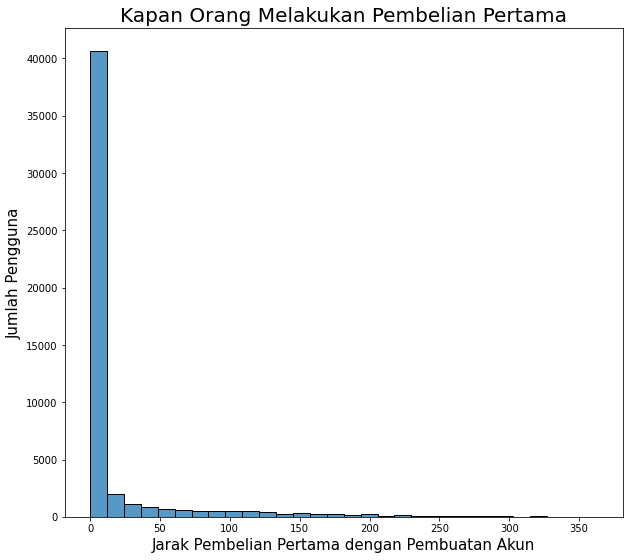

In [32]:
#visualisasi kapan orang melakukan pembelian pertama

fig, ax = plt.subplots(figsize=(10, 9))
sns.histplot(data=orders, x='age_to_buy',bins=30).set_title('Kapan Orang Melakukan Pembelian Pertama',fontdict={'size': 20})
ax.set_xlabel('Jarak Pembelian Pertama dengan Pembuatan Akun',fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengguna',fontdict={'size': 15})
plt.show()


Ternyata sebagian besar pengguna melakukan **pembelian pertamanya** yaitu pada saat **hari pembuatan akun** (hari ke 0). Namun terdapat juga pelanggan yang melakukan pembelian pertamanya setelah setahun (363 hari)

### Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?

Untuk mengetahui berapa jumlah pesanan yang dibuat oleh pelanggan dalam periode waktu tertentu, kita harus mengelompokkan data berdasarkan bulan pembelian dan menghitung total transaksi yang dilakukan oleh setiap pelanggan. Kemudian kita juga akan mencari tahu siapa yang melakukan paling banyak transaksi.

In [33]:
# jumlah pesanan dalam setiap bulan

total_orders = orders.groupby('buy_month').agg({'buy_ts':'count','revenue':'sum'})
total_orders.columns = ['total_transaction','total_revenue']
total_orders = total_orders.reset_index()
total_orders

,buy_month,total_transaction,total_revenue
0,2017-06-01,2354,9557.49
1,2017-07-01,2363,12539.47
2,2017-08-01,1807,8758.78
3,2017-09-01,3387,18345.51
4,2017-10-01,5679,27987.70
5,2017-11-01,5659,27069.93
6,2017-12-01,6218,36388.60
7,2018-01-01,4721,19417.13
8,2018-02-01,5281,25560.54
9,2018-03-01,5326,28834.59


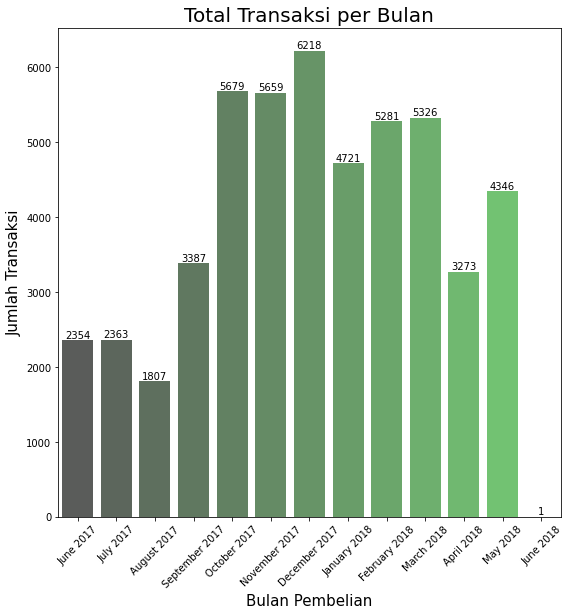

In [34]:
# visualisasi 

fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=total_orders, x='buy_month', y='total_transaction', palette='dark:limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=10,
                   xytext = (0, 5), rotation=0,
                   textcoords = 'offset points')
    
labels_x = [pd.to_datetime(label.get_text()).strftime('%B %Y') for label in splot.get_xticklabels()]
splot.set_xticklabels(labels_x)
ax.set_xlabel('Bulan Pembelian',fontdict={'size': 15})
ax.set_ylabel('Jumlah Transaksi',fontdict={'size': 15})
plt.title('Total Transaksi per Bulan',fontdict={'size': 20})
plt.xticks(rotation = 45) 
plt.show()

* Menjelang akhir tahun, **jumlah transaksi** cenderung meningkat hingga mencapat **puncaknya** pada Bulan **Desember 2017** sebanyak 6218 transaksi
* Pada awal hingga pertengahan tahun 2018 penjualan cenderung fluktuatif

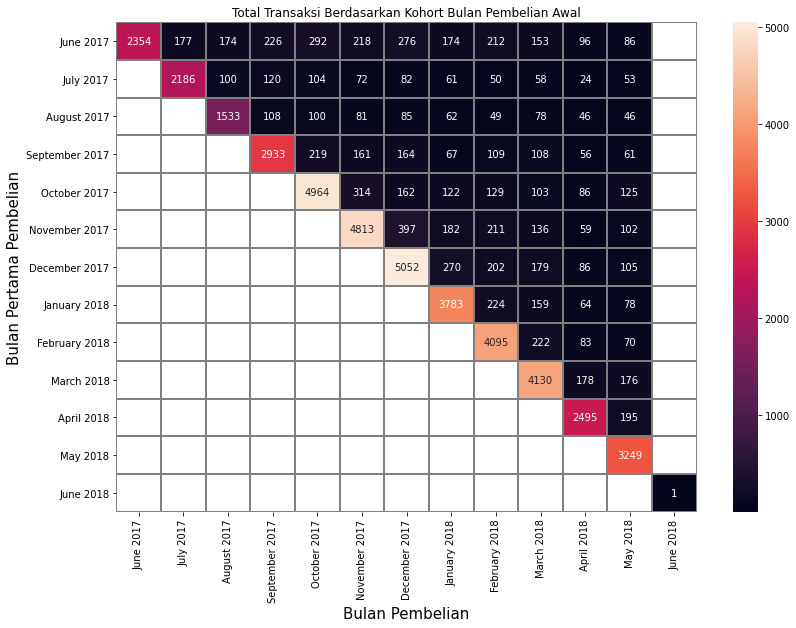

In [35]:
# jumlah transaksi berdasarkan kohort bulan pembelian awal

sum_orders = orders.pivot_table(index='first_order_month',columns='buy_month',values='buy_ts',aggfunc='count')
plt.figure(figsize=(13, 9))
plt.title('Total Transaksi Berdasarkan Kohort Bulan Pembelian Awal')
heatmap = sns.heatmap(sum_orders,annot=True,fmt='.0f',linewidths=1,linecolor='gray') 
labels_x = [pd.to_datetime(label.get_text()).strftime('%B %Y') for label in heatmap.get_xticklabels()]
labels_y = [pd.to_datetime(label.get_text()).strftime('%B %Y') for label in heatmap.get_yticklabels()]
heatmap.set_xticklabels(labels_x)
heatmap.set_yticklabels(labels_y)
heatmap.set_xlabel('Bulan Pembelian', fontdict={'size': 15})
heatmap.set_ylabel('Bulan Pertama Pembelian', fontdict={'size': 15})
plt.show()



Kohort bulan **Maret 2018** menunjukkan perilaku yang menarik. Jumlah transaksi kohort ini di bulan Maret 2018 (bulan awal melakukan pembelian) merupakan yang **tertinggi** senilai 4130 transaksi. Sedangkan Kohort Juni 2018 hanya 1 pesanan yang kemungkinan disebabkan oleh data yang belum di-update karena masih berjalannya bulan tersebut.

### Berapa besaran rata-rata pembeliannya?

Untuk memperoleh jumlah rata-rata pembelian,  kita akan mengelompokkan data yang kita miliki berdasarkan kohort `first_order_month` dan berdasarkan bulan dilakukannya pemesanan (`buy_month`)

In [36]:
# membuat kohort 

orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'buy_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
orders_grouped_by_cohorts

revenue   uid
first_order_month buy_month                 
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88
...                                ...   ...
2018-03-01        2018-05-01   1114.87    58
2018-04-01        2018-04-01  10600.69  2276
                  2018-05-01   1209.92    69
2018-05-01        2018-05-01  13925.76  2988
2018-06-01        2018-06-01      3.42     1

[79 rows x 2 columns]

Kemudian, mari kita temukan pendapatan rata-rata yang dihasilkan per pengguna. Kita harus membagi `revenue` dengan jumlah nilai `uid`. Setelah itu, kita akan menyusun sebuah pivot table yang dapat menunjukkan perubahan pendapatan per pengguna untuk setiap kohort berdasarkan bulan dilakukannya pemesanan, serta mengevaluasi perubahan pendapatan per pengguna dari waktu ke waktu

In [37]:
#membuat kohort dengan pendapatan per user 

orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']) 
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='buy_month',values='revenue_per_user',aggfunc='mean') 

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Untuk mengevaluasi perubahan dalam pendapatan per pengguna sehubungan dengan waktu yang telah berlalu sejak pembelian pertama dilakukan, kita akan membuat kolom `cohort_lifetime` atau siklus hidup yang menunjukkan bulan terjadinya suatu peristiwa sehubungan dengan jarak waktunya dari bulan kohort. Nilai siklus hidup diperoleh dari mengurangi bulan dilakukannya pembelian (`buy_month`)dengan bulan pembelian pertama (`first_order_month`)  

In [38]:
#mencari siklus hidup cohort

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['buy_month'] - orders_grouped_by_cohorts['first_order_month'])
orders_grouped_by_cohorts['cohort_lifetime'].head() 

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [39]:
orders_grouped_by_cohorts

,first_order_month,buy_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0 days
1,2017-06-01,2017-07-01,981.82,61,16.095410,30 days
2,2017-06-01,2017-08-01,885.34,50,17.706800,61 days
3,2017-06-01,2017-09-01,1931.30,54,35.764815,92 days
4,2017-06-01,2017-10-01,2068.58,88,23.506591,122 days
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,61 days
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0 days
76,2018-04-01,2018-05-01,1209.92,69,17.535072,30 days
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0 days


Selanjutnya, kita akan mengonversi tipe data agar menampilkan jumlah bulan di antara kedua tanggal. Kita perlu membagi `cohort_lifetime` dengan nilai konstanta np.timedelta64(1, 'M') untuk mencari tahu berapa nilai yang setara dengan satu bulan pada `cohort_lifetime` kemudian membulatkan nilai tersebut.

In [40]:
#mengonversi dan membulatkan data untuk menampilkan jumlah bulan 

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))
print(orders_grouped_by_cohorts[['first_order_month', 'buy_month', 'cohort_lifetime']].head())
print(orders_grouped_by_cohorts[['first_order_month', 'buy_month', 'cohort_lifetime']].tail()) 

  first_order_month  buy_month  cohort_lifetime
0        2017-06-01 2017-06-01                0
1        2017-06-01 2017-07-01                1
2        2017-06-01 2017-08-01                2
3        2017-06-01 2017-09-01                3
4        2017-06-01 2017-10-01                4
   first_order_month  buy_month  cohort_lifetime
74        2018-03-01 2018-05-01                2
75        2018-04-01 2018-04-01                0
76        2018-04-01 2018-05-01                1
77        2018-05-01 2018-05-01                0
78        2018-06-01 2018-06-01                0


Karena kita hanya ingin menampilkan tahun dan bulan untuk pengidentifikasi kohort, kita akan menggunakan strftime() untuk mengubah tipe data datetime menjadi string

In [41]:
#mengubah tipe datetime menjadi tipe string dalam format date

orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y') 
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 
orders_grouped_by_cohorts
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Jumlah pembelian rata-rata pelanggan'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

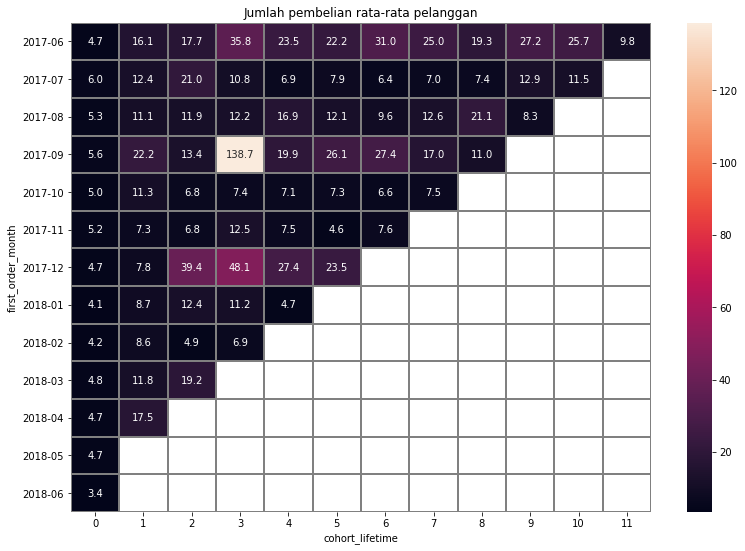

In [42]:
#visualisasi kohort 

plt.figure(figsize=(13, 9))
plt.title('Jumlah pembelian rata-rata pelanggan')
sns.heatmap(revenue_per_user_pivot,annot=True,fmt='.1f',linewidths=1,linecolor='gray') 

Secara keseluruhan, hanya ada beberapa kohort dengan waktu satu bulan yang menunjukkan perilaku menarik. Misalnya pada Kohort bulan September 2017 yang mengalami lonjakan pada bulan ketiga. Kemudian Kohort Juni 2017 dan Kohort Desember 2017 yang juga mengalami lonjakan di bulan ketiga.

### Berapa jumlah uang yang mereka kontribusikan? (LTV)

In [43]:
# menghitung jumlah pelanggan baru setiap bulan

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [44]:
# mengetahui selisih bulan pembelian dengan bulan pertama kali pembelian

cohorts = orders.groupby(['first_order_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
cohorts['cohort_lifetime'] = (cohorts['buy_month'] - cohorts['first_order_month']).dt.days
cohorts['cohort_lifetime'] = round(cohorts['cohort_lifetime'] / 30,0).astype('int')
cohorts

,first_order_month,buy_month,revenue,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [45]:
# menghitung ltv

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['ltv'] = report['revenue'] / report['n_buyers']
report

,first_order_month,n_buyers,buy_month,revenue,cohort_lifetime,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [46]:
# membuat pivot table berdasarkan nilai ltv

output = report.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean').cumsum(axis=1)
output

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


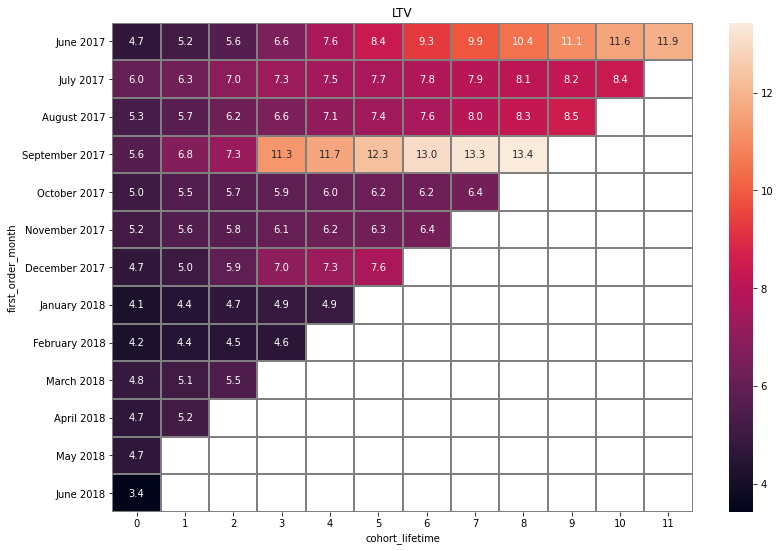

In [47]:
#visualisasi LTV

output.index = pd.to_datetime(output.index)  
output.index = output.index.strftime('%B %Y')  

plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output,annot=True,fmt='.1f',linewidths=1,linecolor='gray') 
plt.yticks(rotation=0)
plt.show()

Berdasarkan hasil yang diperoleh kita bisa melihat adanya peningkatan nilai LTV seiring berjalannya waktu. Semakin lama siklus hidupnya, maka akan semakin banyak pendapatan yang diperoleh dari suatu pelanggan. Kohort pertama yaitu Kohort **Juni 2017** dan Kohort **September 2017** merupakan kohort dengan nilai **LTV** yang paling **menonjol**.

## Analisis Pemasaran

### Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

In [48]:
# menghitung biaya pengeluaran keseluruhan

print('Total pengeluaran secara keseluruhan dalam dollar yaitu',cost['costs'].sum())

Total pengeluaran secara keseluruhan dalam dollar yaitu 329131.62


In [49]:
# menghitung biaya dari waktu ke waktu (per bulan)

monthly_cost = cost.groupby('costs_month').agg({'costs': 'sum'}).reset_index()
monthly_cost = monthly_cost.rename(columns={'costs':'costs_per_month'})
monthly_cost

,costs_month,costs_per_month
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


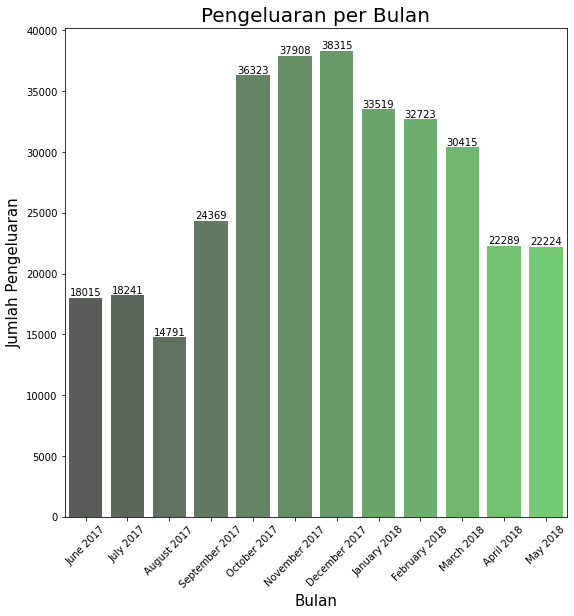

In [50]:
# visualisasi pengeluaran per bulan

fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=monthly_cost, x='costs_month', y='costs_per_month', palette='dark:limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=10,
                   xytext = (0, 5), rotation=0,
                   textcoords = 'offset points')
    
labels_x = [pd.to_datetime(label.get_text()).strftime('%B %Y') for label in splot.get_xticklabels()]
splot.set_xticklabels(labels_x)
ax.set_xlabel('Bulan',fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengeluaran',fontdict={'size': 15})
plt.title('Pengeluaran per Bulan',fontdict={'size': 20})
plt.xticks(rotation = 45) 
plt.show()

Dari bar plot di atas dapat terlihat adanya peningkatan pengeluaran selepas bulan Agustus 2017 dan mencapai **pengeluaran terbesarnya** di bulan **Desember 2017** senilai 38315 dollar. Kemudian di tahun 2018 pengeluaran perlahan-lahan mulai menurun

In [51]:
# pengeluaran per sumber 

source_cost = cost.groupby('source_id').agg({'costs': 'sum'}).reset_index()
source_cost = source_cost.rename(columns={'costs':'costs_per_source'})
source_cost

,source_id,costs_per_source
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


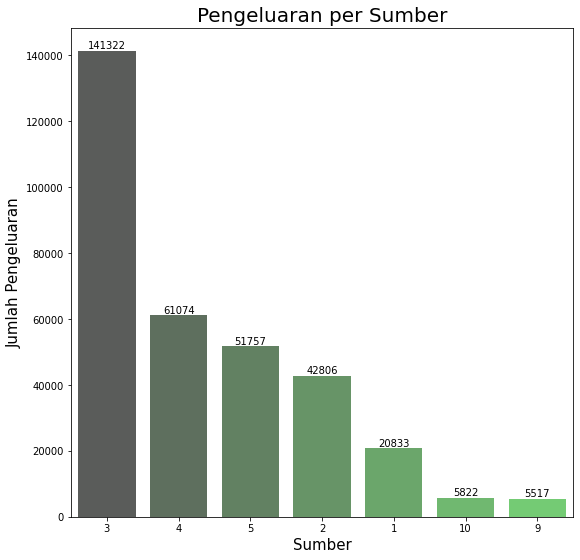

In [52]:
# visualisasi pengeluaran per sumber 

source_cost_sorted = source_cost.sort_values(by='costs_per_source', ascending=False)
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=source_cost_sorted, x='source_id', y='costs_per_source', order=source_cost_sorted['source_id'], palette='dark:limegreen', alpha=0.75, ax=ax)
ax.set_xlabel('Sumber', fontdict={'size': 15})
ax.set_ylabel('Jumlah Pengeluaran', fontdict={'size': 15})
plt.title('Pengeluaran per Sumber', fontdict={'size': 20})
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', size=10,
                xytext=(0, 5), rotation=0,
                textcoords='offset points')

plt.show()

Dalam kurun waktu kurang lebih satu tahun, ternyata sumber ke **3** memakan **biaya yang paling tinggi** dibandingkan sumber lainnya yaitu senilai 141322 dollar sedangkan sumber **9** merupakan sumber dengan **pengeluaran terendah** dengan nilai 5517 dollar

### Berapa biaya akuisisi pelanggan dari masing-masing sumber?

Biaya akuisisi pelanggan atau CAC (customer acquisition cost) adalah biaya yang dihabiskan untuk menarik seorang pelanggan. Kita akan menghitung CAC dengan membagi biaya untuk tiap sumber dengan jumlah pelanggan

In [53]:
# menghitung pelanggan yang diperoleh per source

total_user = visit.groupby('source_id').agg({'uid': 'count'}).reset_index()
total_user 

,source_id,uid
0,1,34121
1,2,47626
2,3,85609
3,4,101794
4,5,66905
5,6,6
6,7,36
7,9,13276
8,10,10025


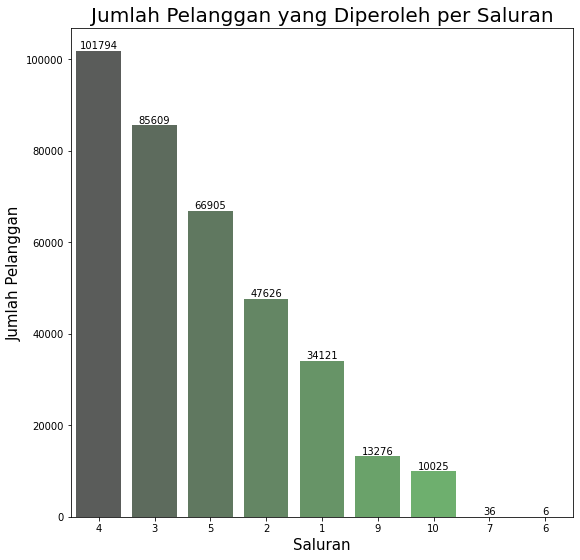

In [54]:
# visualisasi jumlah pelanggan yang diperoleh per source

total_user_sorted = total_user.sort_values(by='uid', ascending=False)
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=total_user_sorted, x='source_id', y='uid', order=total_user_sorted['source_id'], palette='dark:limegreen', alpha=0.75, ax=ax)
ax.set_xlabel('Saluran', fontdict={'size': 15})
ax.set_ylabel('Jumlah Pelanggan', fontdict={'size': 15})
plt.title('Jumlah Pelanggan yang Diperoleh per Saluran', fontdict={'size': 20})
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', size=10,
                xytext=(0, 5), rotation=0,
                textcoords='offset points')

plt.show()

Ternyata **sumber 4** merupakan sumber yang dapat menarik **pelanggan dengan jumlah tertinggi** senilai **101794 pengguna**
sedangkan sumber 6 hanya mampu menarik 6 pengguna

In [55]:
# menghitung nilai cac (customer aquisition cost) per saluran

cust_aq_cost = total_user.merge(source_cost, on='source_id')
cust_aq_cost['cac'] = cust_aq_cost['costs_per_source'] / cust_aq_cost['uid']
cust_aq_cost

,source_id,uid,costs_per_source,cac
0,1,34121,20833.27,0.610570
1,2,47626,42806.04,0.898796
2,3,85609,141321.63,1.650780
3,4,101794,61073.60,0.599972
4,5,66905,51757.10,0.773591
5,9,13276,5517.49,0.415599
6,10,10025,5822.49,0.580797


* Ternyata tidak ada informasi mengenai sumber no 6 dan 7 yang menandakan bahwa kedua sumber tersebut tidak mengeluarkan biaya sama sekali
* Sumber 3 memiliki nilai cac yang paling tinggi namun pengeluarannya sangat besar meskipun cukup menarik banyak pelanggan
* **Sumber 4** memiliki nilai **cac** yang relatif **rendah** namun dapat menarik **pelanggan paling banyak**

### Seberapa menguntungkannya investasi tersebut? (ROI)

Kita akan menggabungkan terlebih dahulu tabel visit dan orders untuk memperoleh keuntungan per sumber. Untuk menghitung ROI per sumber, kita akan membagi keuntungan (`revenue`) dengan biaya pengeluaran per sumber (`costs_per_source`)

In [56]:
# menggabungkan dataframa visit dan order

merged_df = orders.merge(visit, how='left',left_on=['uid','buy_date'],right_on=['uid','start_date'])
merged_df

,buy_ts,revenue,uid,buy_month,buy_week,buy_date,first_order_date,first_order_month,first_session,age_to_buy,device,end_ts,source_id,start_ts,start_year,start_month,start_week,start_date,session_duration_sec
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,0,desktop,2017-06-01 00:11:00,1.0,2017-06-01 00:09:00,2017.0,2017-06-01,2017-06-01,2017-06-01,120.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,0,desktop,2017-06-01 00:25:00,2.0,2017-06-01 00:14:00,2017.0,2017-06-01,2017-06-01,2017-06-01,660.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00,0,desktop,2017-06-01 00:34:00,2.0,2017-06-01 00:25:00,2017.0,2017-06-01,2017-06-01,2017-06-01,540.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00,0,desktop,2017-06-01 00:33:00,2.0,2017-06-01 00:14:00,2017.0,2017-06-01,2017-06-01,2017-06-01,1140.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00,0,desktop,2017-06-01 07:59:00,3.0,2017-06-01 07:31:00,2017.0,2017-06-01,2017-06-01,2017-06-01,1680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63678,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:50:00,2018-05-01,2018-05-31 09:11:00,0,touch,2018-05-31 09:12:00,4.0,2018-05-31 09:11:00,2018.0,2018-05-01,2018-05-31,2018-05-31,60.0
63679,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:50:00,2018-05-01,2018-05-31 23:05:00,0,desktop,2018-05-31 23:55:00,10.0,2018-05-31 23:05:00,2018.0,2018-05-01,2018-05-31,2018-05-31,3000.0
63680,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:54:00,2018-05-01,2018-05-31 23:52:00,0,desktop,2018-05-31 23:55:00,3.0,2018-05-31 23:52:00,2018.0,2018-05-01,2018-05-31,2018-05-31,180.0
63681,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-31,2018-05-31 23:56:00,2018-05-01,2017-10-23 12:32:00,220,NaN,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN


In [57]:
# memfilter waktu pembelian yang berada dalam satu sesi

merged_df = merged_df.loc[(merged_df['buy_ts'] >= merged_df['start_ts']) & (merged_df['buy_ts'] <= merged_df['end_ts'])]

In [58]:
# menghitung keuntungan yang diperoleh per sumber 

total_revenue = merged_df.groupby('source_id').agg({'revenue':'sum'}).reset_index()
total_revenue

,source_id,revenue
0,1.0,28595.14
1,2.0,33517.50
2,3.0,30276.50
3,4.0,34390.76
4,5.0,33581.31
5,7.0,1.22
6,9.0,2746.67
7,10.0,3079.24


In [59]:
# menggabungkan keuntungan per sumber

cust_aq_cost = cust_aq_cost.merge(total_revenue, on='source_id',how='outer')
cust_aq_cost

,source_id,uid,costs_per_source,cac,revenue
0,1.0,34121.0,20833.27,0.610570,28595.14
1,2.0,47626.0,42806.04,0.898796,33517.50
2,3.0,85609.0,141321.63,1.650780,30276.50
3,4.0,101794.0,61073.60,0.599972,34390.76
4,5.0,66905.0,51757.10,0.773591,33581.31
5,9.0,13276.0,5517.49,0.415599,2746.67
6,10.0,10025.0,5822.49,0.580797,3079.24
7,7.0,NaN,NaN,NaN,1.22


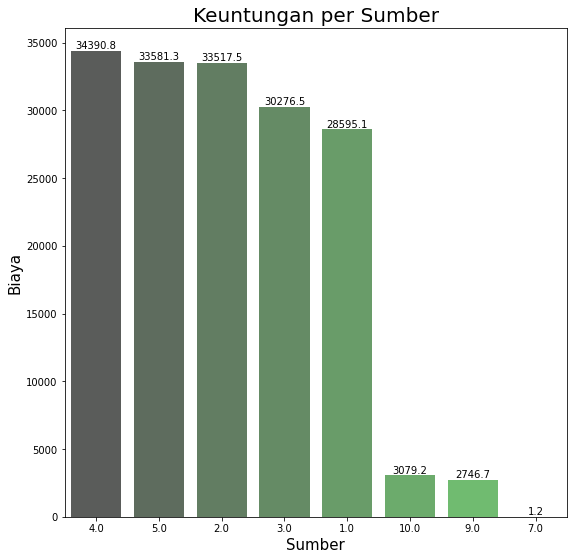

In [60]:
# visualisasi keuntungan dan biaya per sumber

total_revenue_sorted = total_revenue.sort_values(by='revenue', ascending=False)
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=total_revenue_sorted, x='source_id', y='revenue', order=total_revenue_sorted['source_id'], palette='dark:limegreen', alpha=0.75, ax=ax)
ax.set_xlabel('Sumber', fontdict={'size': 15})
ax.set_ylabel('Biaya', fontdict={'size': 15})
plt.title('Keuntungan per Sumber', fontdict={'size': 20})
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', size=10,
                xytext=(0, 5), rotation=0,
                textcoords='offset points')

plt.show()



* **Sumber 4** memiliki **keuntungan tertinggi** yaitu 34391 dollar 
* Sumber 5, 2, 3, dan 1 memiliki perbedaan yang tidak terlalu jauh dengan keuntungan di Sumber 4 karena masih berada di rentang 30000 dollar 
* Sumber 9 dan 10 memiliki keuntungan yang jauh di bawah sumber lain namun masih lebih menguntungkan dibandingkan sumber 7
* Sumber 7 merupakan sumber dengan keuntungan paling sedikit yaitu 1,2 dollar

In [61]:
# menghitung ROI

cust_aq_cost['roi'] = cust_aq_cost['revenue'] / cust_aq_cost['costs_per_source']
cust_aq_cost['source_id'] = cust_aq_cost['source_id'].astype(str)
cust_aq_cost

,source_id,uid,costs_per_source,cac,revenue,roi
0,1.0,34121.0,20833.27,0.610570,28595.14,1.372571
1,2.0,47626.0,42806.04,0.898796,33517.50,0.783009
2,3.0,85609.0,141321.63,1.650780,30276.50,0.214238
3,4.0,101794.0,61073.60,0.599972,34390.76,0.563104
4,5.0,66905.0,51757.10,0.773591,33581.31,0.648825
5,9.0,13276.0,5517.49,0.415599,2746.67,0.497812
6,10.0,10025.0,5822.49,0.580797,3079.24,0.528853
7,7.0,NaN,NaN,NaN,1.22,NaN


posx and posy should be finite values
posx and posy should be finite values


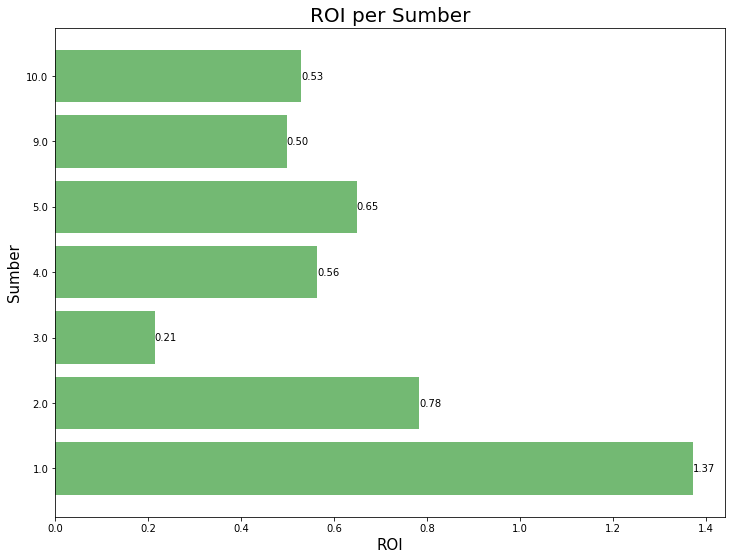

In [62]:
# visualisasi roi

fig, ax = plt.subplots(figsize=(12, 9))
bars = ax.barh(cust_aq_cost['source_id'], cust_aq_cost['roi'], color='green',alpha=0.55)
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2.0,
             '{:.2f}'.format(width),
             ha='left', va='center')

ax.set_xlabel('ROI', fontdict={'size': 15})
ax.set_ylabel('Sumber', fontdict={'size': 15})
plt.title('ROI per Sumber', fontdict={'size': 20})
plt.show()

* **Sumber 1** merupakan satu-satunya sumber yang berhasil menutupi biaya pemasaran dan mendapat **keuntungan** sebesar **37%**
* Sumber 3 merupakan sumber yang memngeluarkan biaya paling besar namun ternyata hanya menutupi biaya pemasaran sebesar 20%

# Kesimpulan

## Pra - Pemrosesan Data

* Beberapa tipe data harus diubah untuk memperkecil ukuran data, misalkan pada kolom device pada tabel visit yang diubah menjadi tipe category karena hanya mengandung beberapa nilai tertentu. Kemudian kolom tanggal pada tabel visit dan costs yang harus diubah dalam datetime
* Judul kolom yang masih berantakan
* Tidak ada duplikasi dan nilai yang hilang
* Terdapat anomali pada nilai pada kolom `Start Ts` dan `End Ts`

## Eksplorasi Data Analisis

### Produk

* Jumlah pengguna bulanan yaitu 23228 pengguna, pengguna mingguan yaitu 5621 pengguna, danpengguna harian 907 pengguna
* Bulan Agustus 2017 memiliki jumlah pengguna bulanan yang terendah, namun setelah itu selalu mengalami peningkatan hingga mencapai puncaknya pada November 2017
* pengguna menghabiskan **paling banyak 1 sesi per harinya** 
* Pengguna mengakses aplikasi dengan **durasi rata-rata sekitar 643 detik** atau kurang lebih 10 menit
* Dalam sebulan, hanya **3,9 %** pengguna yang kembali menggunakan aplikasi. Ini presentasi sticky factor yang cukup kecil.
* Untuk **meningkatkan sticky factor**, mungkin bisa menerapkan **push notification dan fitur bantuan**  

### Penjualan

* Rata-rata pelanggan melakukan pembelian pertama yaitu pada sesi pertamanya (hari ke 0). Namun terdapat juga pelanggan yang melakukan pembelian pertamanya setelah setahun (363 hari)
* Menjelang akhir tahun, jumlah transaksi cenderung meningkat hingga mencapat puncaknya pada Bulan **Desember 2017 sebanyak 6218 transaksi**
- Pada awal hingga pertengahan tahun 2018 penjualan cenderung fluktuatif
- Jumlah pendapatan rata-rata per siklus hidup terus bertambah seiring berjalanannya waktu dengan Kohort September 2017 memperoleh pendapatan tertinggi sebesar 138 dollar di bulan ketiga
- **Kohort bulan Maret 2018** memiliki jumlah **transaksi tertinggi** sebanyak **4130 transaksi**
-  **Kohort Juni 2017** mengalami **lonjakan mulai dari bulan ke 5** dan **Kohort September 2017** mengalami **lonjakan mulai dari bulan ke 3** menjadikannya kohort dengan LTV yang paling menonjol
- Untuk meningkatkan pendapatan bisa dengan menawarkan promosi hingga memanfaatkan sumber iklan yang mampu menarik banyak pelanggan baru untuk melakukan pembelian 

### Pemasaran

- **Total pengeluaran** secara keseluruhan dalam yaitu **329131.62 dollar**
- **Pengeluaran terbesarnya** di bulan **Desember 2017** senilai 38315 dollar
- Sumber ke 3 memakan biaya yang paling tinggi senilai 141322 dollar sedangkan 6 dan 7 tidak mengeluarkan biaya
- Sumber 3 memiliki nilai cac yang paling tinggi namun pengeluarannya sangat besar dan hanya menutupi biaya pemasaran sebesar 20% meskipun cukup menarik banyak pelanggan 
- Sumber 4 memiliki nilai cac yang relatif rendah namun dapat menarik pelanggan paling banyak (101794 pengguna) dan keuntungan tertinggi serta hanya menutupi biaya pemasaran sebesar 56%
- Sumber 1 merupakan satu-satunya sumber yang berhasil menutupi biaya pemasaran dan mendapat keuntungan sebesar 37%. Namun jika dibandingkan sumber lain, pendapatan yang diperoleh sumber 1 masih lebih kecil.
* Akan lebih baik untuk **berinvestasi pada sumber 4** karena dapat menarik **pelanggan lebih banyak** sehingga **keuntungan** yang diperoleh juga **lebih tinggi** dan akan lebih cepat untuk **meningkatkan tingkat roi**.